In [11]:
import zipfile

import numpy as np 

import pytesseract

import cv2

from PIL import Image,ImageDraw

# global varble decleaction


# load the model 

face_cascade=cv2.CascadeClassifier("readonly/haarcascade_frontalface_default.xml")

project_dict={}

Results found in file a-0.png


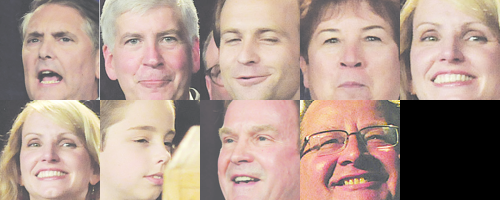

Results found in file a-1.png


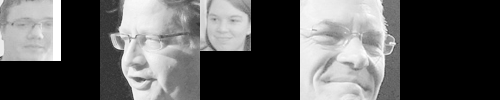

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


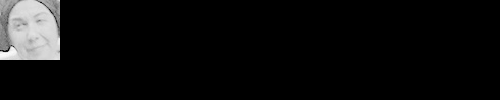

Results found in file a-2.png


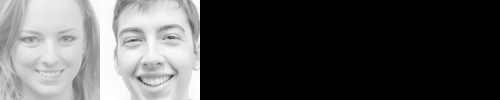

Results found in file a-3.png


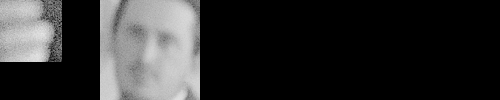

Results found in file a-8.png
But there were no faces in that file!


In [12]:
file_name_list=[]
zip_file=zipfile.ZipFile("readonly/images.zip")
for details in zip_file.infolist():
    project_dict[details.filename] = [Image.open(zip_file.open(details.filename))]
    #APPEND THE IMAGE IN THE DICTIONARY USING THE HINT GIVEN 
    file_name_list.append(details.filename)

#ITTERATE THROUGH ALL THE FILES
for name in file_name_list:
    #OPEN THE IMAGE OF A PARTICULAR FILE
    image=project_dict[name][0]
    #USE PYTESSERACT.IMAGE_TO_STRING TO GET THE TEXT PRESENT IN THE IMAGE
    project_dict[name].append(pytesseract.image_to_string(image).replace('\n',''))
    
    #CHECK FOR GIVEN INPUT
    #HERE I TOOK THE INPUT AS "MARK" AS IT IS GIVEN IN THE TEST CASES 
    #OTHERWISE WE CAN JUST USE INPUT FUNCTION AND GET INPUT WHAT USER WANT OT SEARCH
    if "Mark" in project_dict[name][1]:
        print('Results found in file',name)
        #WHEN INPUT IS PRESENT IN THE TEXT
        
        try:
            faces = (face_cascade.detectMultiScale(np.array(image),1.37,4)).tolist()
            #FIND THE FACES PRESENT IN THE IMAGE USING HAARCASCADE MODEL
            project_dict[name].append(faces)
            faces_in_each_file = []
            
            #ITTERATE THROUGH THE FAES COORDINATES AND PULL OUT THE IMAGE AND APPEND IT TO NEW LIST 
            for x,y,w,h in project_dict[name][2]:
                faces_in_each_file.append(image.crop((x,y,x+w,y+h)))
            
            #NOW THE FACES ARE PULLED OUT FROM THE MAIN IMAGE
            #ITS TIME TO CREATE A CONTACT_SHEET 
            contact_sheet = Image.new(image.mode, (500,100*int(np.ceil(len(faces_in_each_file)/5))))
            
            #INITILISE CONTACT_SHEET VARIABLE
            x =  y = 0
            
            #NOW PASTE THE FACES DEOM THE LIST TO THE CONTACT_SHEET
            for face in faces_in_each_file:
                face.thumbnail((100,100))
                # THIS IS GIVEN IN HINT NUMBER 4
                contact_sheet.paste(face, (x, y))
                if x+100 == contact_sheet.width:
                    x=0
                    y=y+100
                else:
                    x=x+100
            display(contact_sheet)
        except:
            #WHEN THE INPUT IS SEARCHING IS THERE BUT NO FACE FOUND 
            # WE HAVE TO PRINT THISW
            print ("But there were no faces in that file!")

In [8]:
zip_file.close()